In [44]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline      # To display the plots inside the Jupyter Notebook

UsageError: unrecognized arguments: # To display the plots inside the Jupyter Notebook


In [45]:
#Reading the CSV file
df=pd.read_csv("/home/sonia/PRATUSH/RFI/CleanTx.csv")
df.set_index("Area Served", inplace = True) # Set 'Area Served' column as index on a Dataframe
df=df.loc[["Perth", "Perth City"]] # Using the operator .loc[] to select multiple rows from the Dataframe
df

,Unnamed: 0,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,Licence Number,...,Licence Area ID,Status,Deg,Min,Sec,Deg1,Min1,Sec1,Latitude in degrees,Longitude in degrees
Area Served,,,,,,,,,,,,,,,,,,,,,
Perth,1868,NaN,90.5,HPON,M,25,OD,5000.0,1133459,10501322,...,NaN,Issued,32,0,15,116,4,56,32.004167,116.082222
Perth,1869,6RTR,92.1,Community,M,116,DA,16000.0,1133010,10119216,...,NaN,Issued,32,0,30,116,5,3,32.008333,116.084167
Perth,1870,6MMM,92.9,Commercial,M,128,DA,40000.0,4200001,1384852,...,NaN,Issued,32,0,46,116,3,42,32.012778,116.061667
Perth,1871,6MMM,92.9,Commercial,M,105,DA,40000.0,4200001,1384852,...,NaN,Issued,32,0,26,116,5,2,32.007222,116.083889
Perth,1872,6PER,93.7,Commercial,M,120,DA,40000.0,1133009,1170706,...,NaN,Issued,32,0,39,116,5,4,32.010833,116.084444
Perth,1873,6PER,93.7,Commercial,M,128,DA,40000.0,1133009,1170706,...,NaN,Issued,32,0,46,116,3,42,32.012778,116.061667
Perth,1874,6MIX,94.5,Commercial,M,128,DA,40000.0,4199001,1384881,...,NaN,Issued,32,0,46,116,3,42,32.012778,116.061667
Perth,1875,6MIX,94.5,Commercial,M,105,DA,40000.0,4199001,1384881,...,NaN,Issued,32,0,26,116,5,2,32.007222,116.083889
Perth,1876,6EBA,95.3,Community,M,30,DA,16000.0,185001,1385207,...,NaN,Issued,32,0,30,116,5,3,32.008333,116.084167


In [46]:
#Resolution of the map
nside = 512
print("The number of pixels for the given nside: " + str(hp.nside2npix(nside)))

# Healpy pixel number when input angles are assumed to be longitude and latitude in degree
pixel_indices = hp.ang2pix(nside, df['Longitude in degrees'].to_numpy() ,df['Latitude in degrees'].to_numpy(), lonlat=True)
print(pixel_indices)

The number of pixels for the given nside: 3145728
[738964 738964 738964 738964 738964 738964 738964 738964 738964 738964
 738964 738964 738964 738964 738964 738964 738963 743059 741011]


In [47]:
#Creating user defined input for the  altitude of the satellite above the Earth's surface
altitude=np.int(input("Enter altitude of the satellite in km: "))


<ipython-input-47-3727c6629e00>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  altitude=np.int(input("Enter altitude of the satellite in km: "))


Enter altitude of the satellite in km: 400


In [48]:
# Consider a case of full coverage under elevation of 0 º
Rad= 6371 # Mean radius of Earth in km
FOV= np.degrees(np.arcsin(Rad/(Rad+ altitude)))  # Field of view for maximal coverage in degrees when elevation is 0 º 
 
print(" The Field of view of the satellite at a height of",altitude,"km is",FOV, "degrees")

 The Field of view of the satellite at a height of 400 km is 70.20740346885583 degrees


In [49]:
# The surface of the coverage area of the Earth depends on the central angle

Central_angle=np.arccos(Rad/(Rad+altitude)) # Central angle in radians
    
Dia_of_FOV=2*Central_angle*Rad  # Diameter of the FOV (disc on the Earth's surface)in km
Rad_of_FOV= Dia_of_FOV/2 # Radius of the FOV (disc on the Earth's surface)in km
Rad_of_FOV=Rad_of_FOV/Rad  # Radius of the FOV in Radians

print(" The Radius of the Field of View in radians is",Rad_of_FOV)
Rad_of_FOV

 The Radius of the Field of View in radians is 0.3454459769872743


0.3454459769872743

In [50]:
# The latitude and longitude of a satellite over Perth

lon = np.deg2rad(0) # Longitude of the satellite in radians
lat = np.deg2rad(32.008333)  #Latitude of the satellite in radians
vec = hp.ang2vec(lat,lon) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vector
pixel_disc= hp.query_disc(nside, vec, radius=Rad_of_FOV) # Array of indices of the pixel number that are inside the circle/disc specified by vec and radius
pixel_disc

array([ 35644,  35645,  35646, ..., 601085, 601086, 601087])

In [51]:
data= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
data[pixel_disc]=1

/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


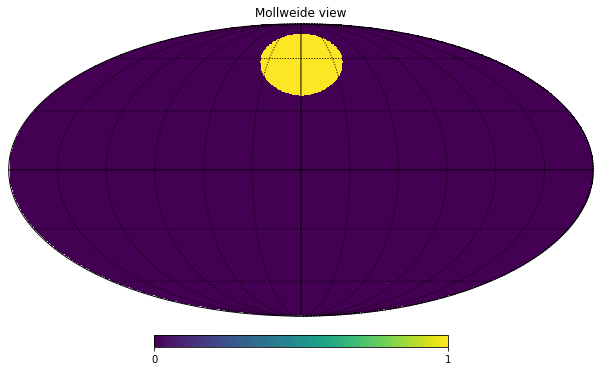

In [53]:
#Plot a healpix map (given as an array) in Mollweide projection
hp.mollview(data)
hp.graticule() # Adds meridians and parallels